In [2]:
# import muDIC as dic
from pathlib import *
from PIL import Image
import numpy as np
Image.MAX_IMAGE_PIXELS = None
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [3]:
from scipy.interpolate import griddata

In [4]:
mesher=dic.Mesher()

NameError: name 'dic' is not defined

In [ ]:
fp=Path('/rwthfs/rz/cluster/work/mz071159/DIC/head/')
list(fp.glob('*.png'))

[PosixPath('/rwthfs/rz/cluster/work/mz071159/DIC/head/50_45_head_pano_2.png'),
 PosixPath('/rwthfs/rz/cluster/work/mz071159/DIC/head/50_45_head_pano_0.png'),
 PosixPath('/rwthfs/rz/cluster/work/mz071159/DIC/head/50_45_head_pano_1.png')]

In [320]:
fp=Path('imgs')

In [323]:
imgs=[]
for file in fp.glob('*.png'):
    img =  np.asarray(Image.open(str(file)))
    if img.ndim>2:
        imgs.append(img[:,:,1])
    else:
        imgs.append(img[:,:])

In [324]:
imgs_for_stacking=[]
for img in imgs:
    
    imgs_for_stacking.append(img[0:2000,0:2000])

path = r"mudic"
image_stack = dic.image_stack_from_list(imgs_for_stacking)

root:INFO:Found 4 images in list


In [134]:
mesher=dic.Mesher()
mesher=mesher.mesh(image_stack,GUI=False,Xc1=0.0,
    Xc2=1000.0,
    Yc1=0.0,
    Yc2=1000.0,
    n_elx=20,
    n_ely=20,)

muDIC.mesh.meshUtilities:INFO:Using Q4 elements
muDIC.mesh.meshUtilities:INFO:Element contains 50.0 X 50.0 pixels and is divided in 20 X 20 


In [135]:
inputs=dic.DICInput(mesher,image_stack)
dic_job = dic.DICAnalysis(inputs)
results = dic_job.run()

muDIC.solver.correlate:INFO:Processing frame nr: 1
root:INFO:Did not converged in 39 iterations last increment was 7.9696
muDIC.solver.correlate:INFO:Processing frame nr: 2
root:INFO:Did not converged in 39 iterations last increment was 8.5835


In [137]:
fields = dic.Fields(results)
true_strain = fields.true_strain()

root:INFO:Post processing results from Q4 elements. The seed variable is ignored and the values are extracted at the element centers. Use the upscale value to get interpolated fields.


In [138]:
viz = dic.Visualizer(fields,images=image_stack)

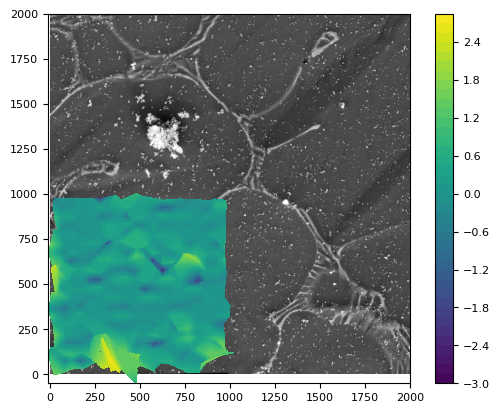

In [139]:
viz.show(field="True strain", component = (1,1), frame = 2)

In [145]:

fig, axs = plt.subplots(1,3, figsize=(10, 6), layout='constrained')
i=0
for ax in axs:
    ax.imshow(imgs[i][0:1000,0:1000])
    # rom PIL import Image
    im = Image.fromarray(imgs[i][0:2000,0:2000])
    # im.save(f"img_{i}.png")
    # i=i+1

In [153]:
imgs_for_stacking

[array([[88, 80, 64, ..., 80, 78, 82],
        [73, 74, 72, ..., 87, 88, 87],
        [60, 62, 65, ..., 80, 90, 85],
        ...,
        [66, 72, 68, ..., 76, 68, 69],
        [67, 71, 76, ..., 67, 66, 65],
        [74, 78, 77, ..., 69, 80, 78]], dtype=uint8),
 array([[ 80,  73,  72, ...,  69,  69,  55],
        [ 83,  81,  76, ...,  68,  82,  72],
        [ 72,  74,  85, ...,  70,  71,  67],
        ...,
        [ 54,  53,  65, ..., 109, 131,  98],
        [ 61,  66,  70, ...,  77,  78,  67],
        [ 60,  71,  56, ...,  66,  64,  63]], dtype=uint8),
 array([[ 89,  85,  84, ...,  82,  89,  93],
        [ 87,  95,  96, ...,  71,  86,  93],
        [ 86,  99,  98, ...,  80,  99, 103],
        ...,
        [ 60,  69,  61, ...,  74,  59,  57],
        [ 70,  69,  64, ...,  77,  70,  53],
        [ 78,  73,  67, ...,  64,  62,  54]], dtype=uint8)]

In [100]:
i

3

In [5]:
import pandas as pd


In [6]:
df=pd.read_csv("4mm_stufendaten_csv_0.000 s.csv",sep=';',skiprows=5)
df2=pd.read_csv("4mm_stufendaten_csv_2.000 s.csv",sep=';',skiprows=5)

(0.0, 4.0)

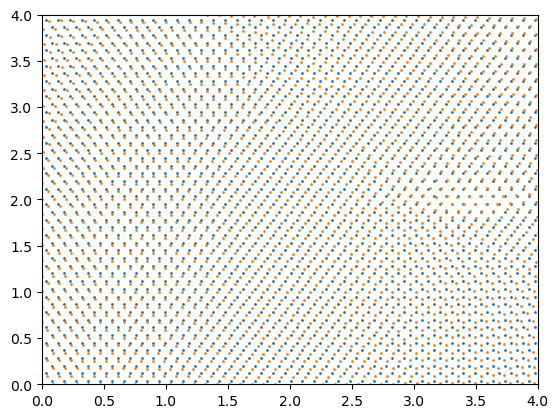

In [7]:
plt.scatter(df['x'],df['y'],s=1)
plt.scatter(df2['x'],df2['y'],s=1)
plt.xlim([0,4])
plt.ylim([0,4])

In [8]:
df_diff=pd.merge(df,df2,on='id',suffixes=['_1','_2'])
df_diff['dx']=df_diff['x_1']-df_diff['x_2']
df_diff['dy']=df_diff['y_1']-df_diff['y_2']
df_diff


,id,x_1,y_1,z_1,x_2,y_2,z_2,dx,dy
0,3802,18.1520,-24.7845,0.0,18.1454,-24.4997,0.0,0.0066,-0.2848
1,3803,18.0878,-24.8561,0.0,18.0809,-24.5714,0.0,0.0069,-0.2847
2,3804,18.0619,-24.9473,0.0,18.0555,-24.6621,0.0,0.0064,-0.2852
3,3805,18.0784,-25.0421,0.0,18.0730,-24.7559,0.0,0.0054,-0.2862
4,3806,18.0903,-25.1376,0.0,18.0861,-24.8522,0.0,0.0042,-0.2854
...,...,...,...,...,...,...,...,...,...
642108,889291,51.5311,-27.9492,0.0,52.0992,-27.7623,0.0,-0.5681,-0.1869
642109,889292,51.6272,-27.9492,0.0,52.1950,-27.7596,0.0,-0.5678,-0.1896
642110,889293,51.7234,-27.9492,0.0,52.2907,-27.7564,0.0,-0.5673,-0.1928
642111,889294,51.8196,-27.9492,0.0,52.3860,-27.7532,0.0,-0.5664,-0.1960


(0.0, 4.0)

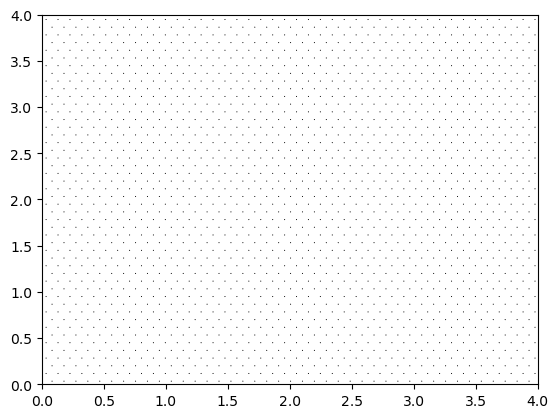

In [9]:
plt.quiver(df_diff['x_1'],df_diff['y_1'],df_diff['dx'],df_diff['dy'])
plt.xlim([0,4])
plt.ylim([0,4])

In [10]:
xmin=-40
xmax=-35
ymin=5
ymax=10



df_plot=df_diff[(df_diff['x_1']>xmin) & (df_diff['x_1']<xmax) & (df_diff['y_1']>ymin) & (df_diff['y_1']<ymax)]
df_plot['abs']=np.sqrt(np.square(df_plot['dx'])+np.square(df_plot['dy']))

/tmp/mz071159/login18-2_216818/ipykernel_136269/1552519654.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['abs']=np.sqrt(np.square(df_plot['dx'])+np.square(df_plot['dy']))


<AxesSubplot: xlabel='x_1', ylabel='y_1'>

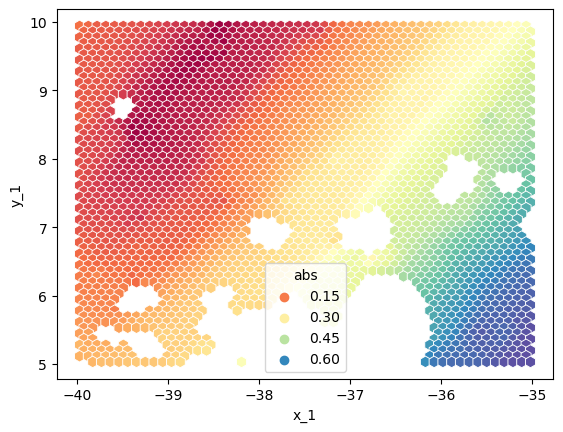

In [11]:


import seaborn as sns
sns.scatterplot(data=df_plot, x='x_1',y='y_1',hue='abs',s=70,palette=sns.color_palette("Spectral",as_cmap=True),marker='h')#,hue_norm=(0.02,0.1))
# plt.xlim([0,4])
# plt.ylim([0,4])

ValueError: not enough values to unpack (expected 2, got 1)

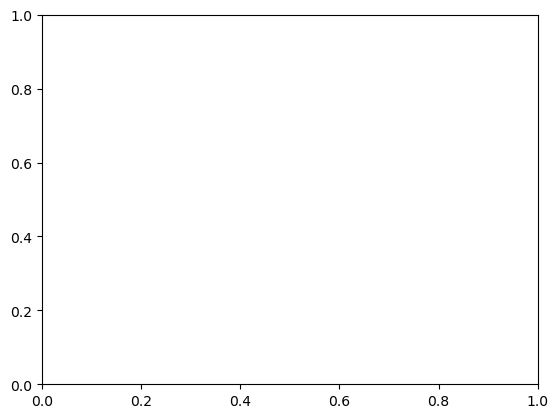

In [12]:
# np.arange(nrows * ncols).reshape(nrows, ncols)
pcm=plt.pcolor(df_plot['x_1'],df_plot['x_2'],df_plot['abs'])

In [162]:
from skimage import data
from skimage import transform
from skimage.color import rgb2gray
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.feature import match_descriptors, plot_matches, SIFT

In [338]:
imgs

[array([[88, 80, 64, ..., 80, 78, 82],
        [73, 74, 72, ..., 87, 88, 87],
        [60, 62, 65, ..., 80, 90, 85],
        ...,
        [66, 72, 68, ..., 76, 68, 69],
        [67, 71, 76, ..., 67, 66, 65],
        [74, 78, 77, ..., 69, 80, 78]], dtype=uint8),
 array([[ 0,  0,  0, ..., 67, 67, 75],
        [ 0,  0,  0, ..., 75, 72, 72],
        [ 0,  0,  0, ..., 83, 77, 75],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8),
 array([[ 89,  85,  84, ...,  82,  89,  93],
        [ 87,  95,  96, ...,  71,  86,  93],
        [ 86,  99,  98, ...,  80,  99, 103],
        ...,
        [ 60,  69,  61, ...,  74,  59,  57],
        [ 70,  69,  64, ...,  77,  70,  53],
        [ 78,  73,  67, ...,  64,  62,  54]], dtype=uint8),
 array([[ 80,  73,  72, ...,  69,  69,  55],
        [ 83,  81,  76, ...,  68,  82,  72],
        [ 72,  74,  85, ...,  70,  71,  67],
        ...,
        [ 54,  53,  65, ..., 1

In [334]:
img1=imgs[0][0:1000,0:1000]
img2=imgs[1][0:1000,0:1000]
descriptor_extractor=SIFT()
# descriptor_extractor.detect_and_extract(img1)


In [335]:
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors
descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors
descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

In [336]:
matches12 = match_descriptors(descriptors1, descriptors2, max_ratio=0.6,
                              cross_check=True)

In [332]:
xmin=400
xmax=600
xmin=400
xmax=600

descriptor_extractor.detect_and_extract(img1[xmin:xmax,ymin:ymax])
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors
descriptor_extractor.detect_and_extract(img2[xmin:xmax,ymin:ymax])
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors
matches12 = match_descriptors(descriptors1, descriptors2, max_ratio=0.6,
                              cross_check=True)

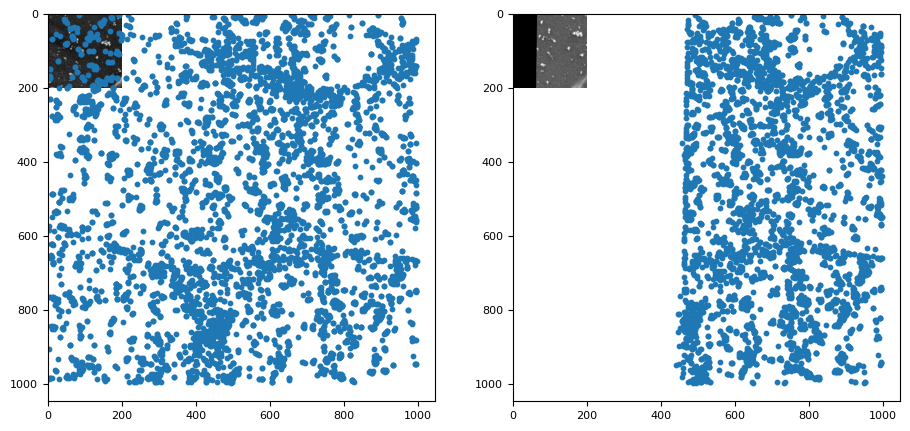

In [337]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 8))
# key1=keypoints1[matches12[:,0]]
ax[0].imshow(img1[xmin:xmax,ymin:ymax])
ax[0].scatter(keypoints1[:,1],keypoints1[:,0],s=10)
ax[1].imshow(img2[xmin:xmax,ymin:ymax])
ax[1].scatter(keypoints2[:,1],keypoints2[:,0],s=10)
# ax[1]
plt.show()

In [315]:
ax

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

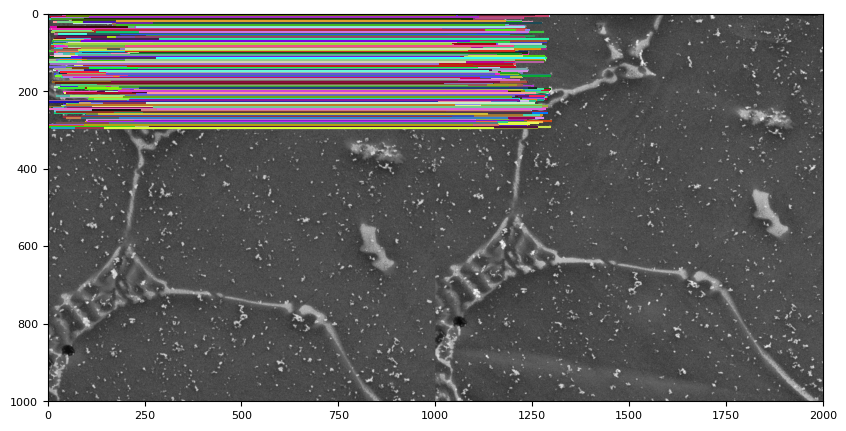

In [278]:
fig, ax = plt.subplots(figsize=(10, 6),)
plot_matches(ax,img1, img2, keypoints1, keypoints2, matches12,only_matches=True)
plt.show()

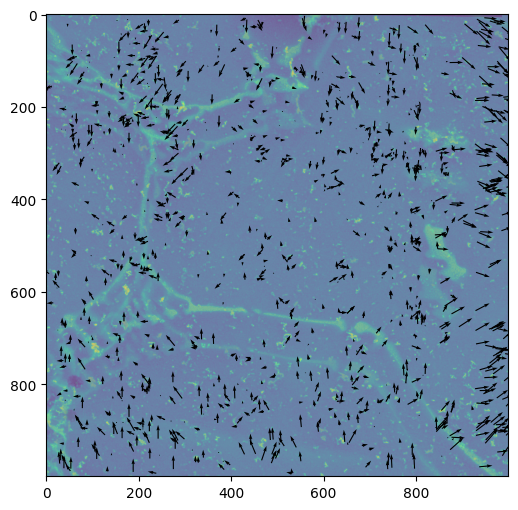

In [96]:
diffs=keypoints1[matches12[:,1]]-keypoints2[matches12[:,1]]
pos=keypoints1[matches12[:,1]]
fig, ax = plt.subplots(figsize=(10, 6),)
plt.imshow(img1,alpha=0.5)
plt.imshow(img2,alpha=0.5)
plt.quiver(pos[:,0],pos[:,1],diffs[:,0],diffs[:,1])


